In [116]:
import pandas as pd
import numpy as np
from collections import Counter

from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from tensorflow.python.keras.callbacks import EarlyStopping




In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
data = pd.read_csv('/content/drive/MyDrive/Pr Project/telangana-crop-health-challenge20241111-30180-1t365vo/DataWithOrgFeatures.csv')


Data preprocessing


In [119]:
df1 = data[data.dataset == 'train'].reset_index(drop=True)
data.head()

,Unnamed: 0,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,...,Season,geometry,dataset,tif_path,ndvi,evi,ndwi,gndvi,savi,msavi
0,0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97,...,Rabi,POLYGON ((78.18079255482755 17.978971746424413...,train,downloads/20240412T050649_20240412T051727_T43Q...,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82,...,Rabi,POLYGON ((78.17483419891283 17.981508840879556...,train,downloads/20240425T051649_20240425T052817_T43Q...,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92,...,Rabi,POLYGON ((78.16888476438905 17.976727511659835...,train,downloads/20240427T050651_20240427T051439_T43Q...,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91,...,Rabi,POLYGON ((78.16821795882959 17.974690113471414...,train,downloads/20241103T050951_20241103T052004_T43Q...,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94,...,Rabi,POLYGON ((78.17244459940454 17.969620948965225...,train,downloads/20240517T050651_20240517T051655_T43Q...,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379


In [120]:
df1.describe()

,Unnamed: 0,FarmID,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi
count,8775.00000,8.775000e+03,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,7867.000000,7.876000e+03,7867.000000,7867.000000,7876.000000,7876.000000
mean,4387.00000,1.252339e+06,76.553504,87.707806,3.550541,57.150199,15.541197,0.690493,1.124705e+10,10.216932,0.294229,1.024979,3841.299388
std,2533.26864,2.447332e+05,15.002601,49.307300,1.391602,22.330291,5.933997,1.678579,1.476962e+11,2.767614,0.895393,2.503640,1507.451726
min,0.00000,2.780000e+02,40.000000,20.000000,1.000000,20.000000,5.000000,0.004725,-1.479292e+03,0.006600,0.003807,0.000000,0.000000
25%,2193.50000,1.314020e+06,65.000000,57.000000,2.000000,42.000000,11.000000,0.122109,-9.660190e-01,9.439487,0.101876,0.180498,3045.559509
50%,4387.00000,1.324434e+06,78.000000,76.000000,4.000000,51.000000,15.000000,0.182362,6.954238e-01,10.915969,0.168352,0.271773,3454.632080
75%,6580.50000,1.329228e+06,89.000000,100.000000,5.000000,82.000000,20.000000,0.260429,2.986414e+00,11.946729,0.215641,0.388238,3963.637573
max,8774.00000,1.332157e+06,100.000000,250.000000,6.000000,100.000000,30.000000,18.339667,4.403293e+12,16.823843,15.784201,27.505635,12733.712891


In [91]:
df1.isnull().sum()

,0
Unnamed: 0,0
FarmID,0
category,0
Crop,0
State,0
District,0
Sub-District,0
SDate,0
HDate,0
CropCoveredArea,0


In [121]:
df1 = df1[df1.isnull().sum(axis = 1) < 6]
df1.isnull().sum()


,0
Unnamed: 0,0
FarmID,0
category,0
Crop,0
State,0
District,0
Sub-District,0
SDate,0
HDate,0
CropCoveredArea,0


In [122]:
from imblearn.under_sampling import RandomUnderSampler

# Define your feature matrix X and label vector y
X = df1.drop(columns=['category'])
y = df1['category']

# Instantiate the undersampler
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply downsampling to balance the dataset
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the updated dataset
print(data_resampled.head())


category
Diseased    422
Healthy     422
Pests       422
Stressed    422
Name: count, dtype: int64
      Unnamed: 0   FarmID       Crop      State      District Sub-District  \
7528        7528  1322873      Paddy  Telangana      Nalgonda      Chityal   
7660        7660  1319950      Maize  Telangana   Mahabubabad     Gangaram   
129          129   468165     Cotton  Telangana         Medak     Alladurg   
8624        8624  1319018     Cotton  Telangana      Adilabad  Inderavelly   
722          722  1327422  Groundnut  Telangana  Mahabubnagar      Hanwada   

           SDate       HDate  CropCoveredArea  CHeight  ...  \
7528  12-04-2023  04-01-2024               95       74  ...   
7660  07-01-2023  11-07-2023               99      136  ...   
129   20-12-2023  29-03-2024               71       94  ...   
8624  17-06-2023  19-09-2023               73       95  ...   
722   03-10-2023  24-02-2024               51       32  ...   

                                               geomet

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [123]:
df1= data_resampled

In [124]:
to_drop = ['FarmID','tif_path','dataset','geometry','Unnamed: 0','State']
df1.drop(to_drop, axis=1, inplace=True)

In [125]:
df1.dropna(inplace=True)

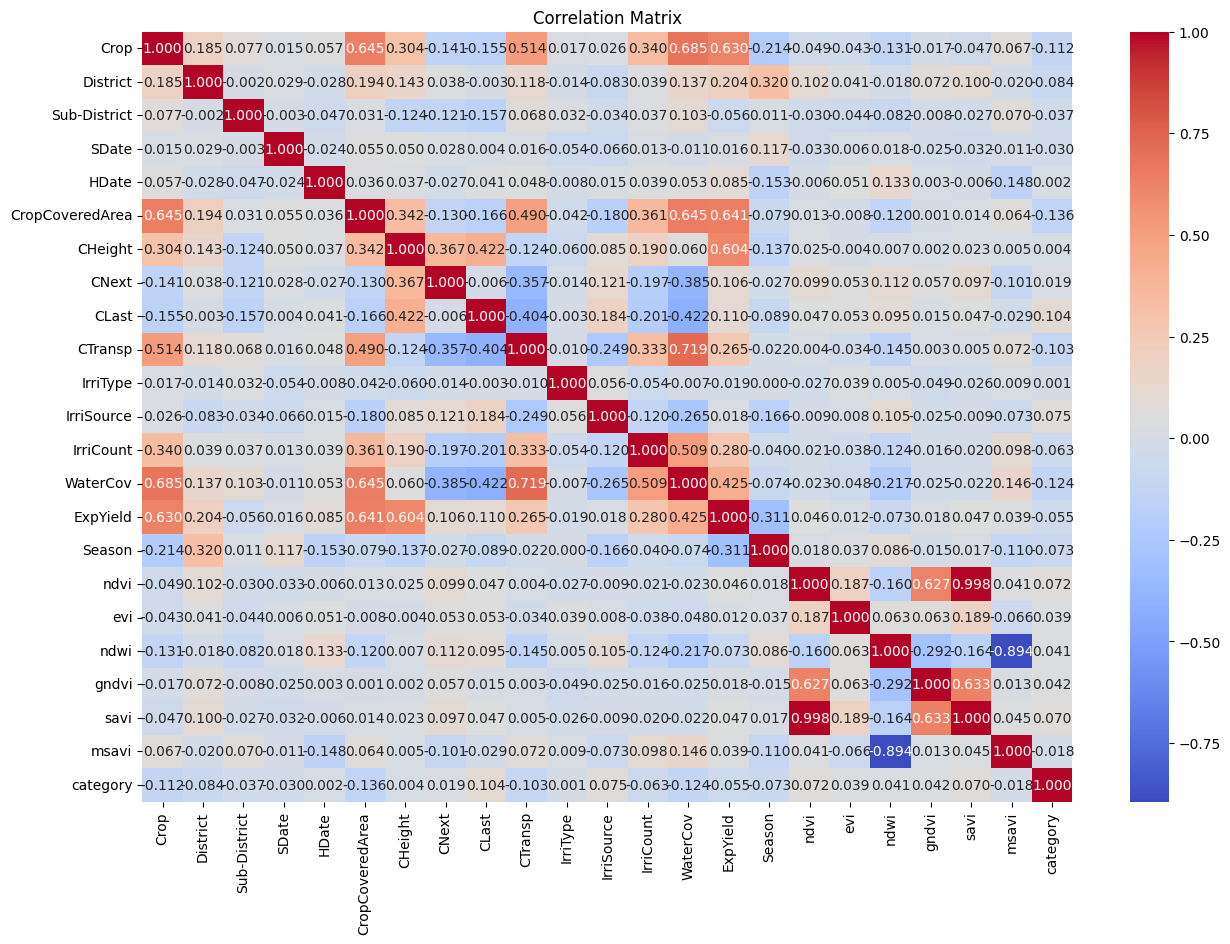

In [126]:
# Copy the original DataFrame
a = df1.copy()

# Select categorical columns
cat_col = a.select_dtypes(include='object')


# Apply Label Encoding to each categorical column
encoder = LabelEncoder()
for col in cat_col.columns:
    a[col] = encoder.fit_transform(a[col])


# Compute the correlation matrix for numerical columns
correlation_matrix = a.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [98]:
df1.head(5)

,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,...,WaterCov,ExpYield,Season,ndvi,evi,ndwi,gndvi,savi,msavi,category
7528,Paddy,Nalgonda,Chityal,12-04-2023,04-01-2024,95,74,Pea,Lentil,Transplanting,...,94,17,Rabi,1.623064,49.265459,10.987920,0.047099,2.434387,3037.373535,Diseased
7660,Maize,Mahabubabad,Gangaram,07-01-2023,11-07-2023,99,136,Soybean,Wheat,Broadcasting,...,52,27,Kharif,0.085738,-4.081701,7.967181,0.099261,0.128598,4377.467285,Diseased
129,Cotton,Medak,Alladurg,20-12-2023,29-03-2024,71,94,Maize,Sorghum,Drilling,...,45,15,Rabi,0.090755,-3.258702,12.546230,0.118821,0.136120,2818.920898,Diseased
8624,Cotton,Adilabad,Inderavelly,17-06-2023,19-09-2023,73,95,Maize,Maize,Seed Drilling,...,59,16,Kharif,3.636817,-46.434326,0.009402,3.762754,5.455072,8520.628906,Diseased
722,Groundnut,Mahabubnagar,Hanwada,03-10-2023,24-02-2024,51,32,Maize,Rice,Broadcasting,...,33,15,Rabi,0.207519,-0.779005,10.488989,0.203907,0.311253,3620.757080,Diseased


Level of severity

In [127]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Feature: {column}")
    print(f"Unique Values: {unique_values}")

Feature: Crop
Unique Values: ['Paddy' 'Maize' 'Cotton' 'Groundnut' 'Bengal Gram' 'Chillies' 'Red Gram']
Feature: District
Unique Values: ['Nalgonda' 'Mahabubabad' 'Medak' 'Adilabad' 'Mahabubnagar' 'Nirmal'
 'Narayanpet' 'Kamareddy' 'Warangal' 'Nagarkurnool' 'Siddipet' 'Khammam'
 'Vikarabad' 'Wanaparthy']
Feature: Sub-District
Unique Values: ['Chityal' 'Gangaram' 'Alladurg' 'Inderavelly' 'Hanwada' 'Gudihathnur'
 'Gudur' 'Utnur' 'Shaligouraram' 'Tanoor' 'Ammanabole' 'Madugulapally'
 'Ichoda' 'Ramayampet' 'Narsimhulapet' 'Tipparthy' 'Boath' 'Kulcharam'
 'Narketpally' 'Neradigonda' 'Vemulapally' 'Mudhole' 'Chegunta' 'Dornakal'
 'Kubeer' 'Havelighanpur' 'Kattangur' 'Seerole' 'Bayyaram' 'Koilkonda'
 'Tripuraram' 'Basar' 'Tirumalagiri_Sagar' 'Shankarampet_R' 'Lokeshwaram'
 'Narsingi' 'Bazarhathnoor' 'Damargidda' 'Chilipched' 'Jainad' 'Beltaroda'
 'Kuravi' 'Adilabad Rural' 'Gadiguda' 'Gudipalli' 'Miryalaguda' 'Midjil'
 'Kothaguda' 'Kowdipally' 'Maripeda' 'Sirikonda' 'Bhainsa' 'Nidamanoor'
 'Th

In [128]:
df1['category'].unique()

array(['Diseased', 'Healthy', 'Pests', 'Stressed'], dtype=object)

In [129]:
df1['Crop'].unique()

array(['Paddy', 'Maize', 'Cotton', 'Groundnut', 'Bengal Gram', 'Chillies',
       'Red Gram'], dtype=object)

<Axes: xlabel='Crop', ylabel='count'>

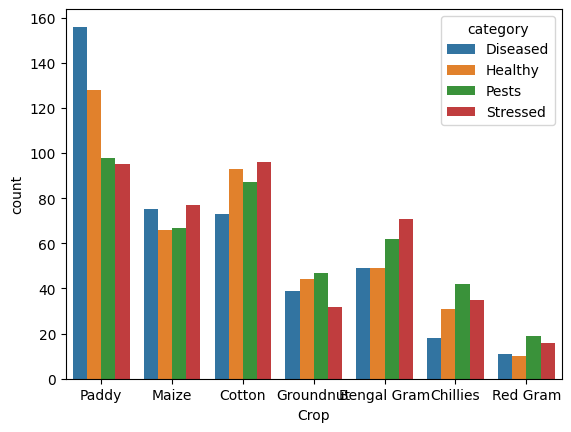

In [130]:
sns.countplot(x='Crop', hue = 'category', data=df1)


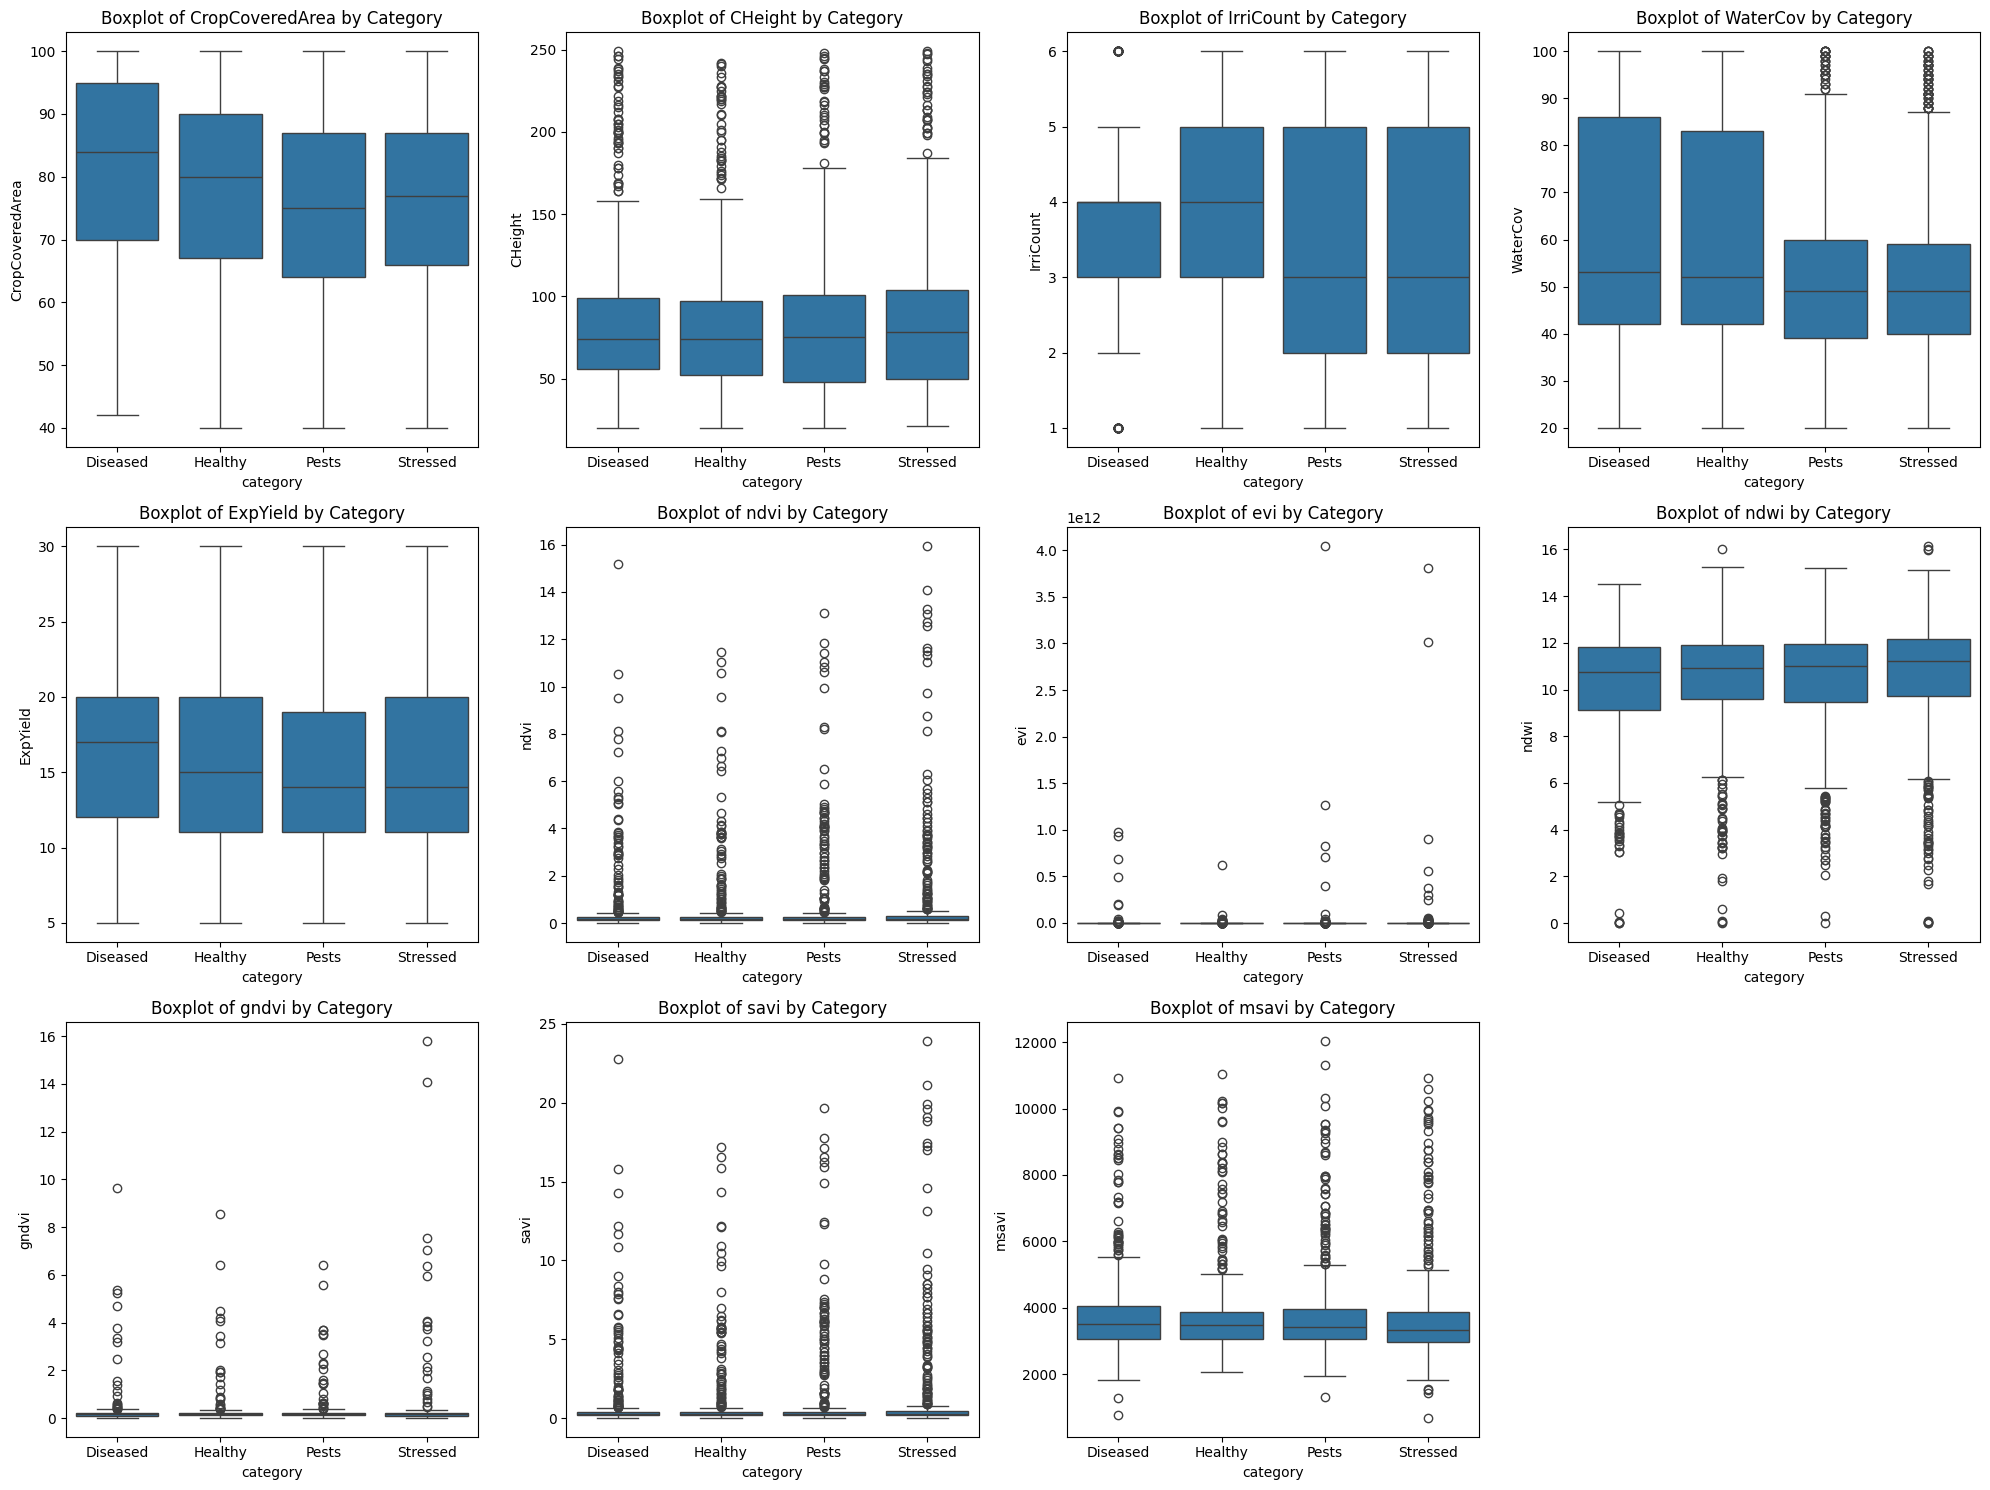

In [131]:
# Get the list of numerical columns in the dataset
numerical_cols = df1.select_dtypes(include='number').columns.tolist()

# Define number of rows and columns in the grid (adjust based on the number of features)
n_cols = 4  # Number of columns in the grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate rows needed

# Create the figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust figsize as necessary
axes = axes.flatten()  # Flatten axes to easily iterate through them

# Plot boxplots for all numerical features by category
for idx, col in enumerate(numerical_cols):
    ax = axes[idx]  # Get the current axis to plot on
    sns.boxplot(x='category', y=col, data=df1, ax=ax)
    ax.set_title(f'Boxplot of {col} by Category')

# Hide any unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [102]:
df1

,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,...,WaterCov,ExpYield,Season,ndvi,evi,ndwi,gndvi,savi,msavi,category
7528,Paddy,Nalgonda,Chityal,12-04-2023,04-01-2024,95,74,Pea,Lentil,Transplanting,...,94,17,Rabi,1.623064,4.926546e+01,10.987920,0.047099,2.434387,3037.373535,Diseased
7660,Maize,Mahabubabad,Gangaram,07-01-2023,11-07-2023,99,136,Soybean,Wheat,Broadcasting,...,52,27,Kharif,0.085738,-4.081701e+00,7.967181,0.099261,0.128598,4377.467285,Diseased
129,Cotton,Medak,Alladurg,20-12-2023,29-03-2024,71,94,Maize,Sorghum,Drilling,...,45,15,Rabi,0.090755,-3.258702e+00,12.546230,0.118821,0.136120,2818.920898,Diseased
8624,Cotton,Adilabad,Inderavelly,17-06-2023,19-09-2023,73,95,Maize,Maize,Seed Drilling,...,59,16,Kharif,3.636817,-4.643433e+01,0.009402,3.762754,5.455072,8520.628906,Diseased
722,Groundnut,Mahabubnagar,Hanwada,03-10-2023,24-02-2024,51,32,Maize,Rice,Broadcasting,...,33,15,Rabi,0.207519,-7.790054e-01,10.488989,0.203907,0.311253,3620.757080,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,Cotton,Adilabad,Bhoraj,15-05-2023,16-10-2023,80,111,Sorghum,Maize,Drilling,...,59,19,Kharif,0.306354,1.188777e+00,9.538167,0.332046,0.459497,4368.395020,Stressed
8703,Cotton,Adilabad,Bhoraj,05-03-2023,31-10-2023,78,113,Sorghum,Sorghum,Drilling,...,43,14,Kharif,0.282313,1.234218e+00,10.472542,0.312732,0.423436,3956.471436,Stressed
8720,Cotton,Adilabad,Jainad,23-06-2023,22-10-2023,85,88,Maize,Sorghum,Broadcasting,...,40,19,Kharif,0.210520,1.037043e+00,9.809634,0.244498,0.315756,4001.794189,Stressed
8738,Cotton,Adilabad,Bela,06-06-2023,27-11-2023,77,95,Maize,Maize,Broadcasting,...,54,11,Kharif,0.438847,3.096591e+09,4.831431,0.045276,0.658245,6934.734863,Stressed


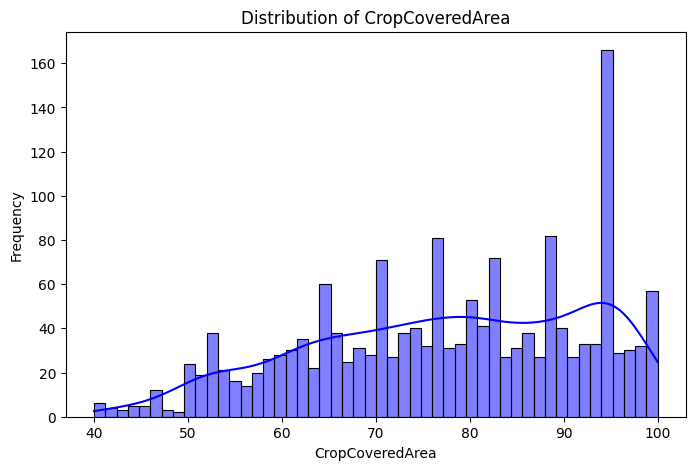

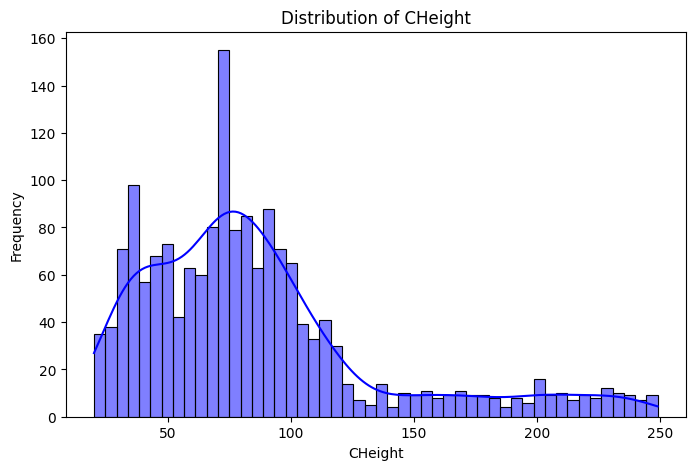

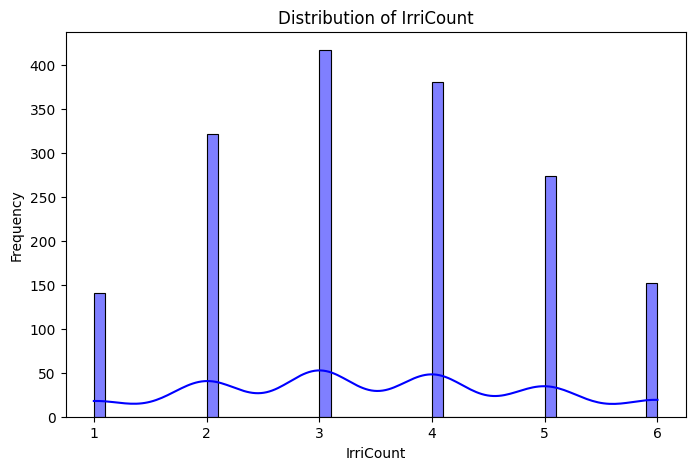

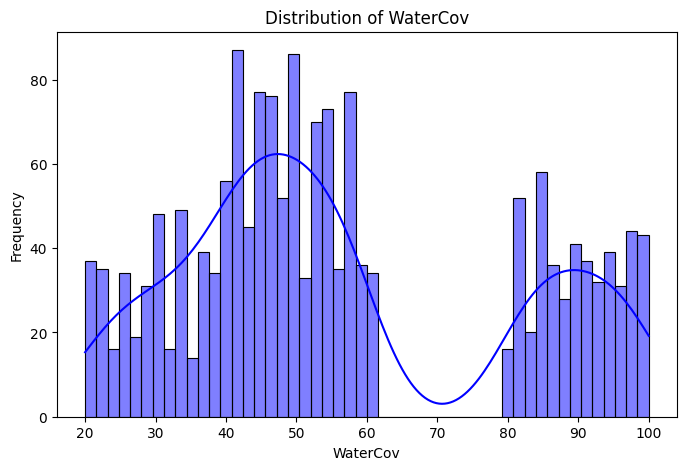

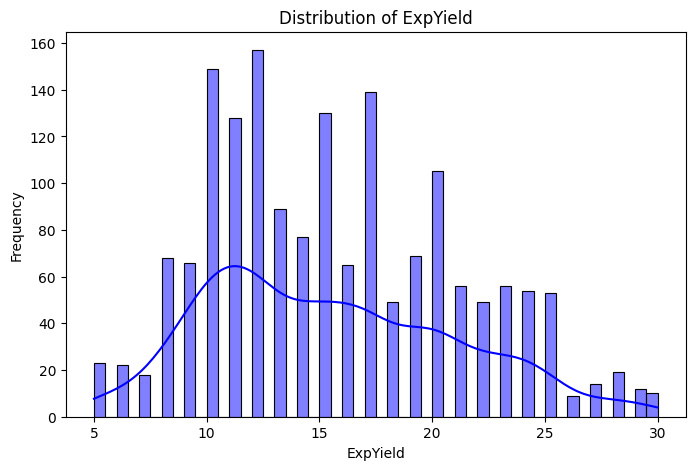

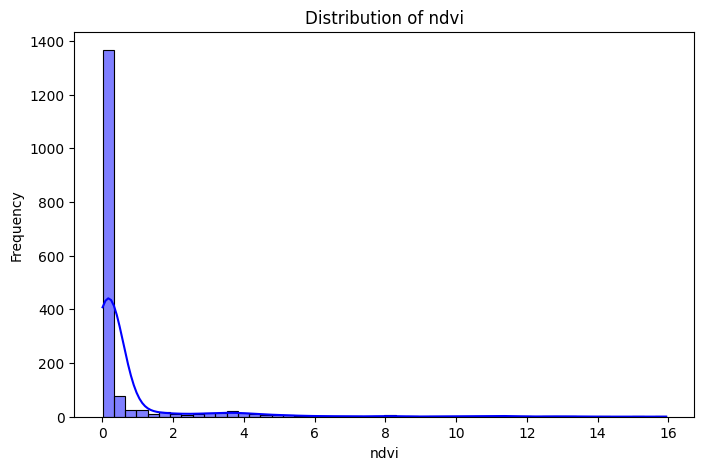

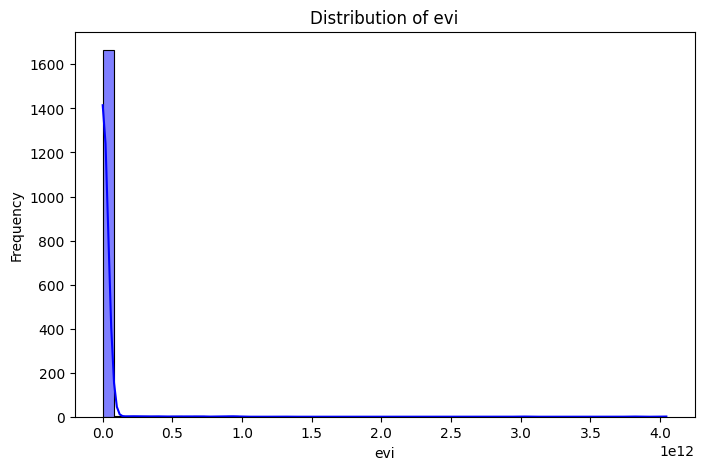

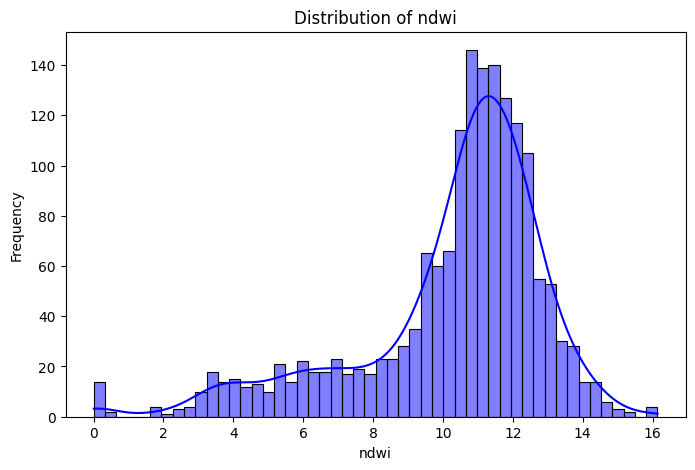

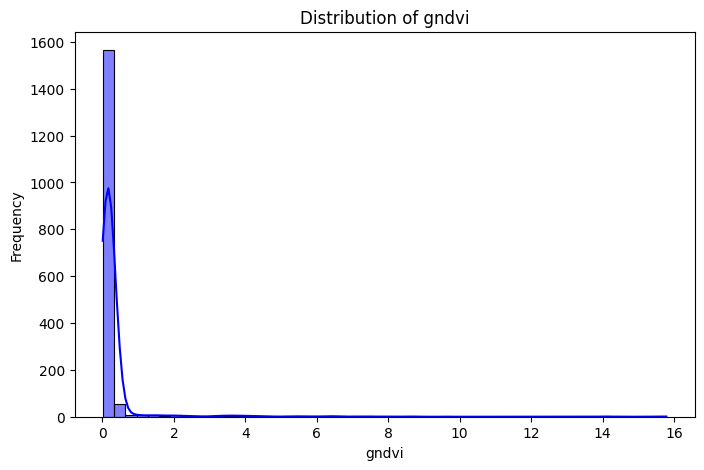

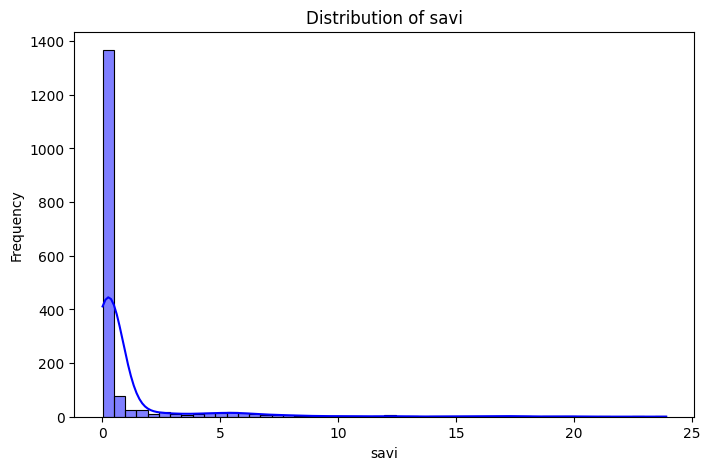

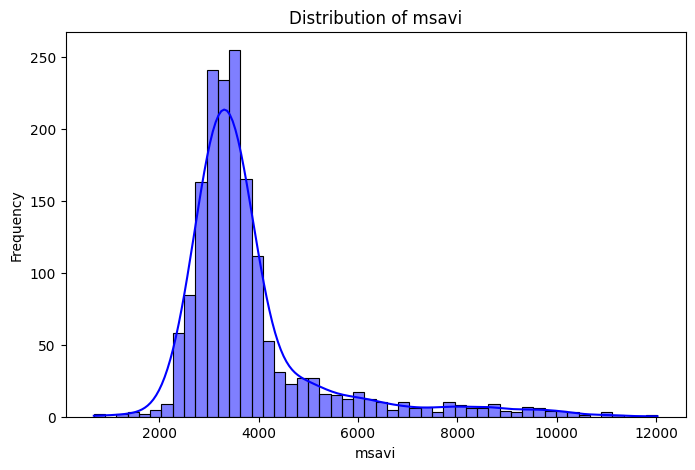

In [132]:
numerical_columns = df1.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=df1, x=col, kde=True, color='blue', bins=50)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [133]:
# # add more feature
# df1['SDate'] = pd.to_datetime(df1['SDate'])
# df1['HDate'] = pd.to_datetime(df1['HDate'])

# df1['Smonth'] = df1['SDate'].dt.month
# df1['Hmonth'] = df1['HDate'].dt.month

# df1['Squarter'] = df1['SDate'].dt.quarter
# df1['Hquarter'] = df1['HDate'].dt.quarter

# df1["dateDiff"] = (df1['HDate'] - df1['SDate']).dt.days

# df1.drop(['SDate','HDate'],inplace=True,axis=1)
# add more feature
df1['SDate'] = pd.to_datetime(df1['SDate'], format='%d-%m-%Y', errors='coerce') # Specify the correct format and handle errors
df1['HDate'] = pd.to_datetime(df1['HDate'], format='%d-%m-%Y', errors='coerce') # Specify the correct format and handle errors

df1['Smonth'] = df1['SDate'].dt.month
df1['Hmonth'] = df1['HDate'].dt.month

df1['Squarter'] = df1['SDate'].dt.quarter
df1['Hquarter'] = df1['HDate'].dt.quarter

df1["dateDiff"] = (df1['HDate'] - df1['SDate']).dt.days

df1.drop(['SDate','HDate'],inplace=True,axis=1)

In [134]:
df1.describe()

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi,Smonth,Hmonth,Squarter,Hquarter,dateDiff
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,77.424081,86.237841,3.463820,56.521352,15.497628,0.711620,1.319919e+10,10.263707,0.287018,1.059239,3830.281628,8.476275,5.422301,3.155991,2.174970,195.994069
std,14.615381,49.691975,1.413645,23.135323,5.529929,1.801634,1.670332e+11,2.717534,0.852336,2.677175,1472.757085,3.291618,3.517428,1.086189,1.158989,127.562755
min,40.000000,20.000000,1.000000,20.000000,5.000000,0.004867,-2.706740e+02,0.007189,0.006576,0.007300,683.116943,1.000000,1.000000,1.000000,1.000000,2.000000
25%,66.000000,51.000000,2.000000,40.000000,11.000000,0.122610,-1.019989e+00,9.477013,0.105466,0.182952,3046.588989,6.000000,3.000000,2.000000,1.000000,109.000000
50%,79.000000,75.000000,3.000000,50.000000,15.000000,0.176653,6.541307e-01,10.961402,0.166372,0.264888,3441.082520,10.000000,4.000000,4.000000,2.000000,154.000000
75%,90.000000,100.000000,5.000000,82.000000,20.000000,0.254105,3.339914e+00,11.969724,0.210258,0.380406,3944.292542,11.000000,9.000000,4.000000,3.000000,261.000000
max,100.000000,249.000000,6.000000,100.000000,30.000000,15.937864,4.044753e+12,16.139005,15.784201,23.903716,12029.844727,12.000000,12.000000,4.000000,4.000000,693.000000


In [135]:
#scale data
numerical_columns = df1.select_dtypes(include=['number']).columns
date_col = ['Sday', 'Smonth', 'Syear', 'Hday', 'Hmonth', 'Hyear', 'dateDiff']
columns_to_scale = [col for col in numerical_columns if col not in date_col]

scaler = StandardScaler()

for col in columns_to_scale:
    df1[col] = scaler.fit_transform(df1[[col]])


In [114]:
df1.describe()

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi,category,Smonth,Hmonth,Squarter,Hquarter,dateDiff
count,1.686000e+03,1.686000e+03,1.686000e+03,1.686000e+03,1.686000e+03,1686.000000,1.686000e+03,1.686000e+03,1.686000e+03,1.686000e+03,1.686000e+03,1686.000000,1686.000000,1686.000000,1.686000e+03,1.686000e+03,1686.000000
mean,1.685748e-17,-5.267962e-18,2.107185e-17,1.685748e-17,-2.107185e-17,0.000000,8.428739e-18,-4.214370e-18,-4.214370e-18,2.107185e-17,-1.264311e-17,0.000000,8.476275,5.422301,2.528622e-17,7.480506e-17,195.994069
std,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297,3.291618,3.517428,1.000297e+00,1.000297e+00,127.562755
min,-2.561355e+00,-1.333364e+00,-1.743401e+00,-1.579065e+00,-1.898893e+00,-0.392401,-7.904478e-02,-3.775320e+00,-3.291256e-01,-3.930455e-01,-2.137554e+00,-1.342703,1.000000,1.000000,-1.985502e+00,-1.014090e+00,2.000000
25%,-7.818797e-01,-7.093358e-01,-1.035800e+00,-7.143300e-01,-8.135660e-01,-0.327028,-7.904478e-02,-2.895739e-01,-2.130686e-01,-3.274150e-01,-5.322841e-01,-0.448275,6.000000,3.000000,-1.064578e+00,-1.014090e+00,109.000000
50%,1.078581e-01,-2.262171e-01,-3.281992e-01,-2.819622e-01,-9.001475e-02,-0.297023,-7.904478e-02,2.568147e-01,-1.415896e-01,-2.968004e-01,-2.643441e-01,0.446153,10.000000,4.000000,7.772679e-01,-1.510129e-01,154.000000
75%,8.607131e-01,2.770315e-01,1.087002e+00,1.101614e+00,8.144243e-01,-0.254020,-7.904478e-02,6.279675e-01,-9.008616e-02,-2.536386e-01,7.743622e-02,1.116974,11.000000,9.000000,7.772679e-01,7.120644e-01,261.000000
max,1.545127e+00,3.276393e+00,1.794603e+00,1.879876e+00,2.623302e+00,8.453859,2.414340e+01,2.162637e+00,1.818740e+01,8.535586e+00,5.569144e+00,1.340581,12.000000,12.000000,7.772679e-01,1.575142e+00,693.000000


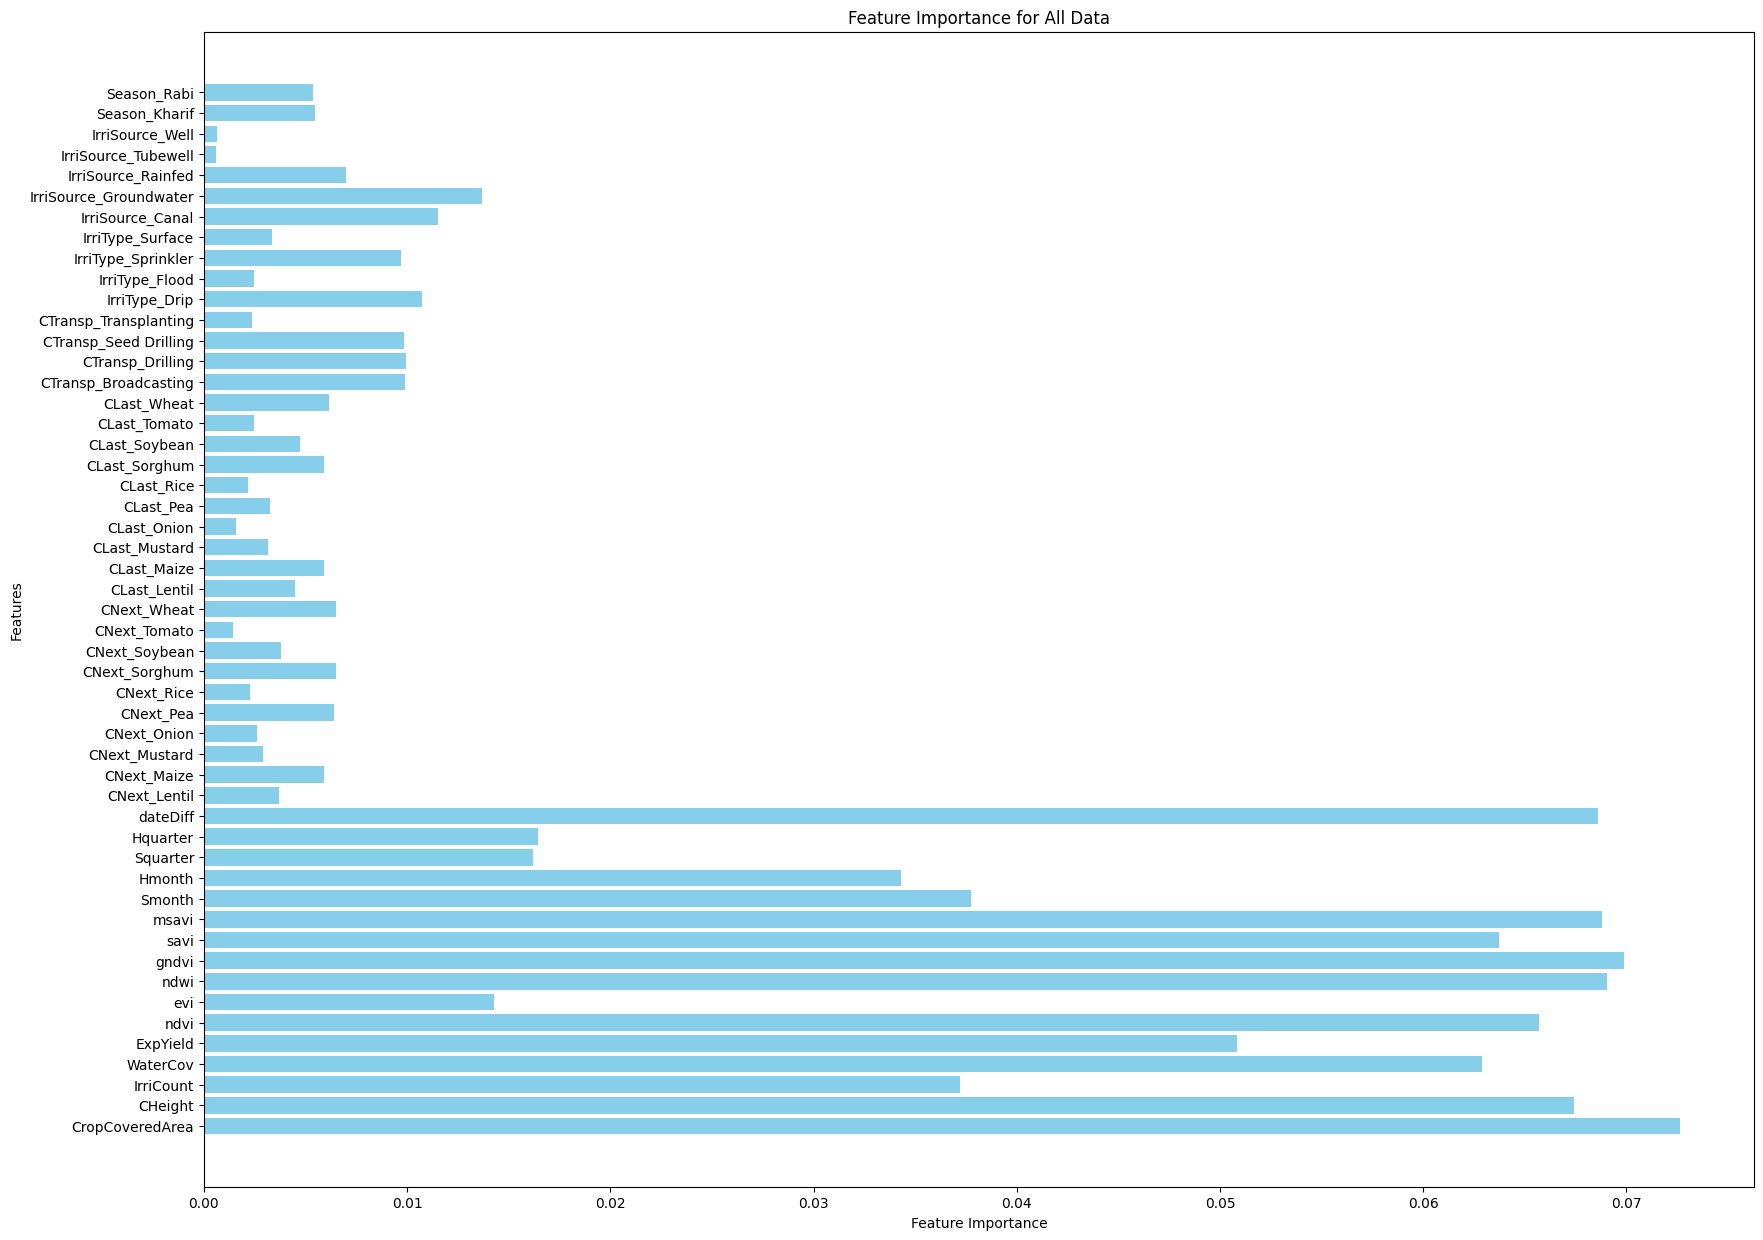

In [136]:
#feature importances for all data

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Prepare the data for the entire dataset
# Encode the target variable 'category'
y = encoder.fit_transform(df1['category'])

# Drop unnecessary columns
df1_processed = df1.drop(columns=['Crop', 'District', 'Sub-District', 'category'], axis=1)

# One-hot encode categorical features
X = pd.get_dummies(df1_processed, columns=df1_processed.select_dtypes(include='object').columns.tolist())

# Train the RandomForestClassifier on the entire dataset
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances for the entire dataset
plt.figure(figsize=(20, 15))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for All Data")
plt.show()


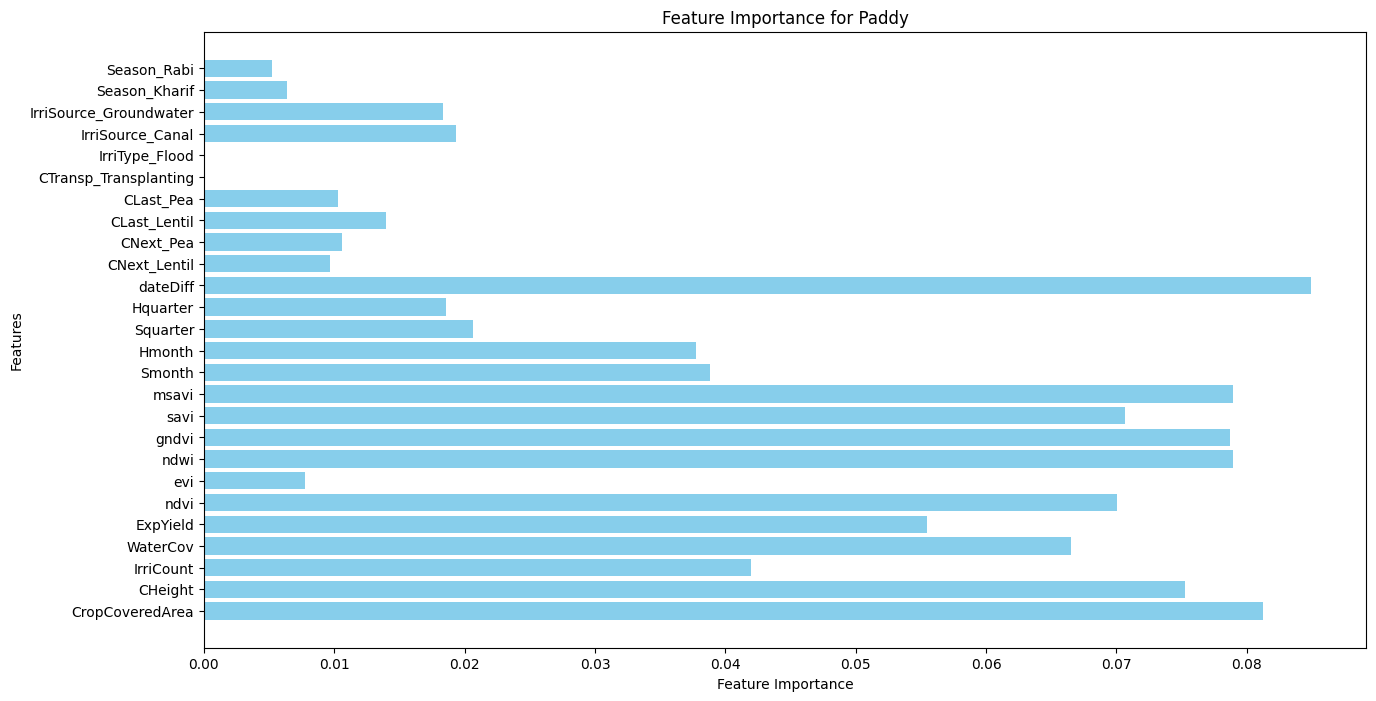

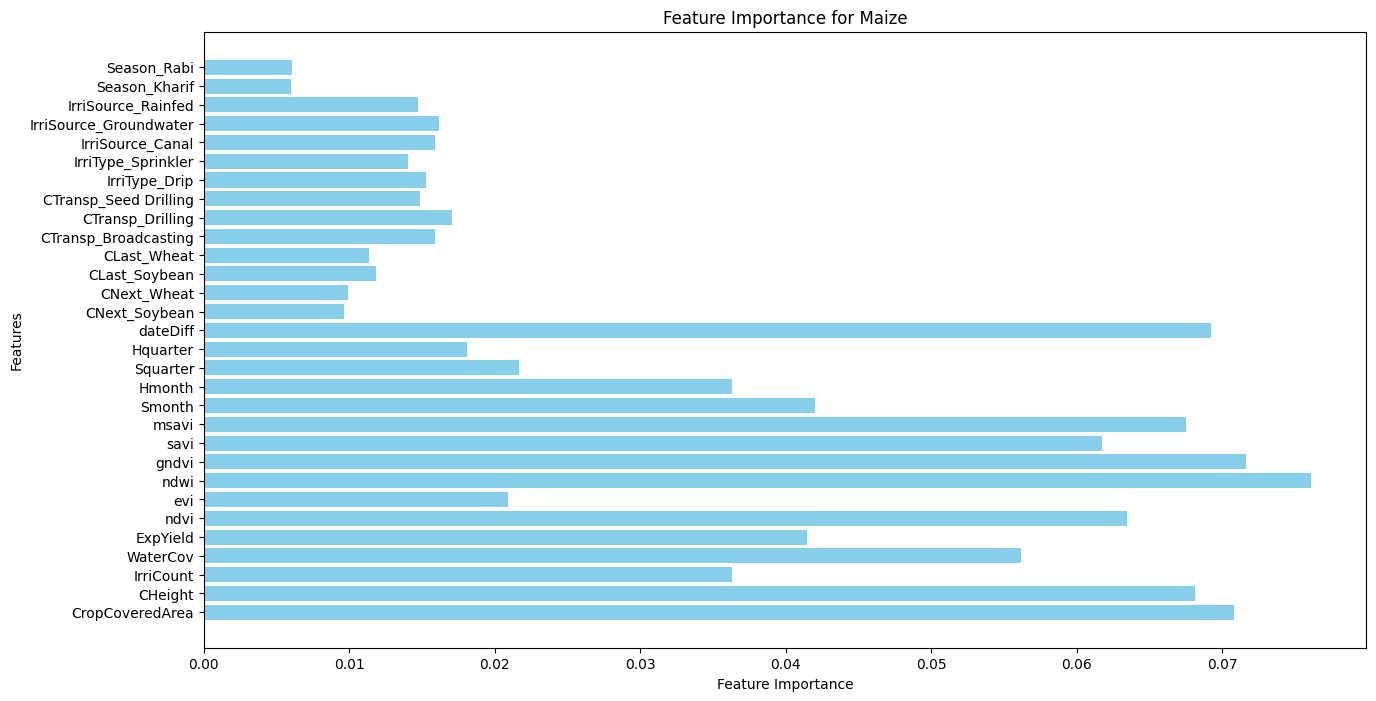

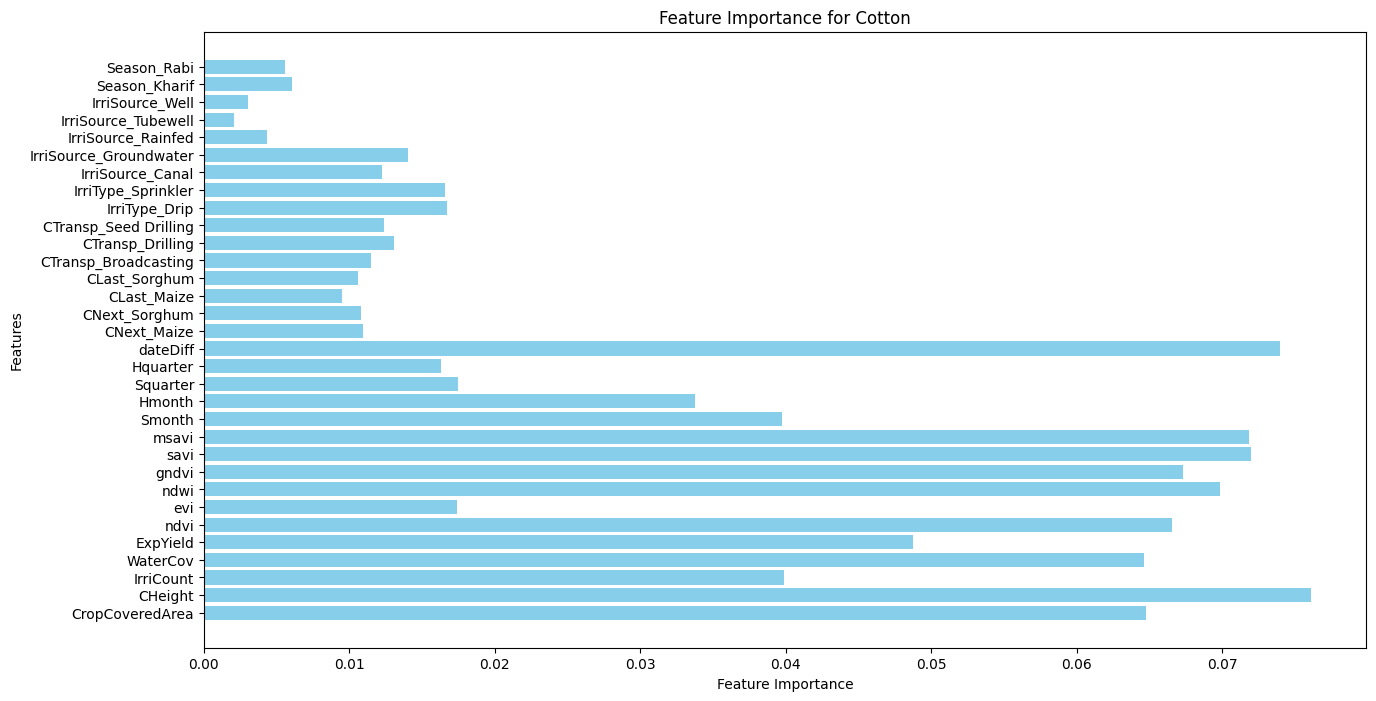

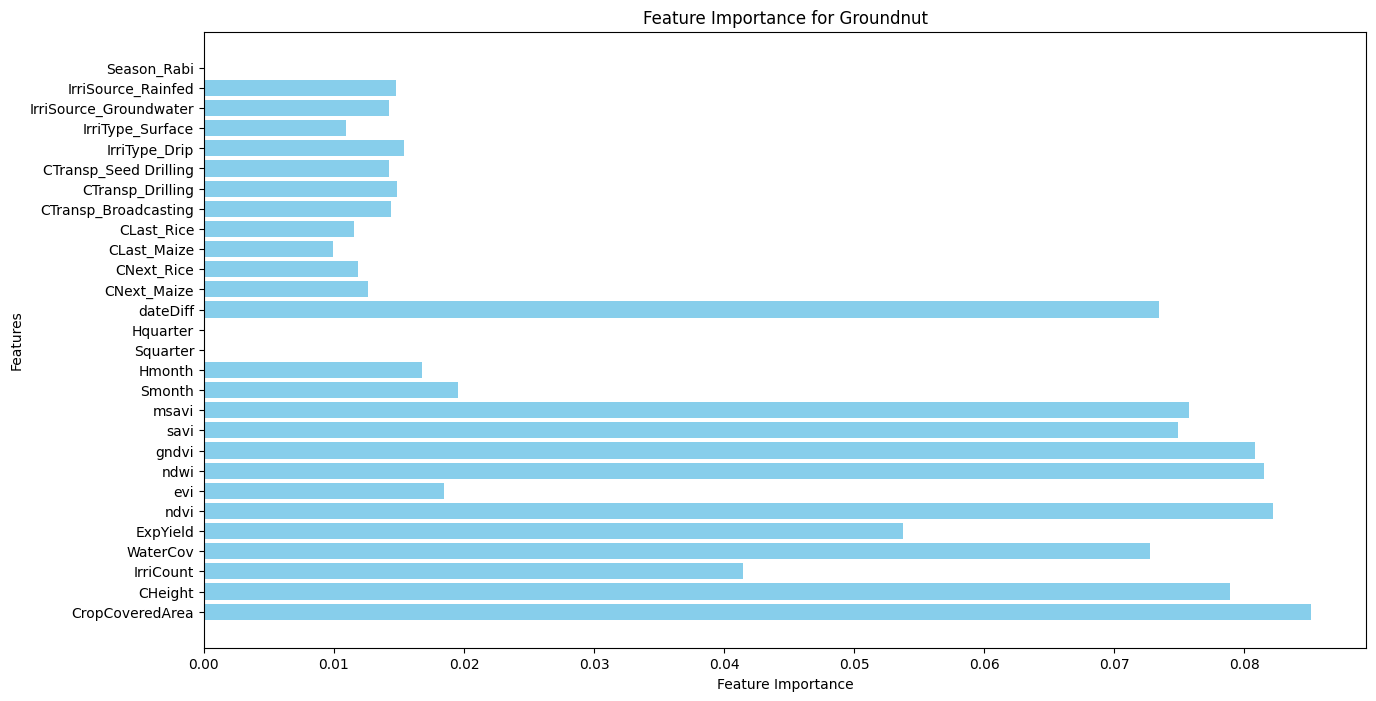

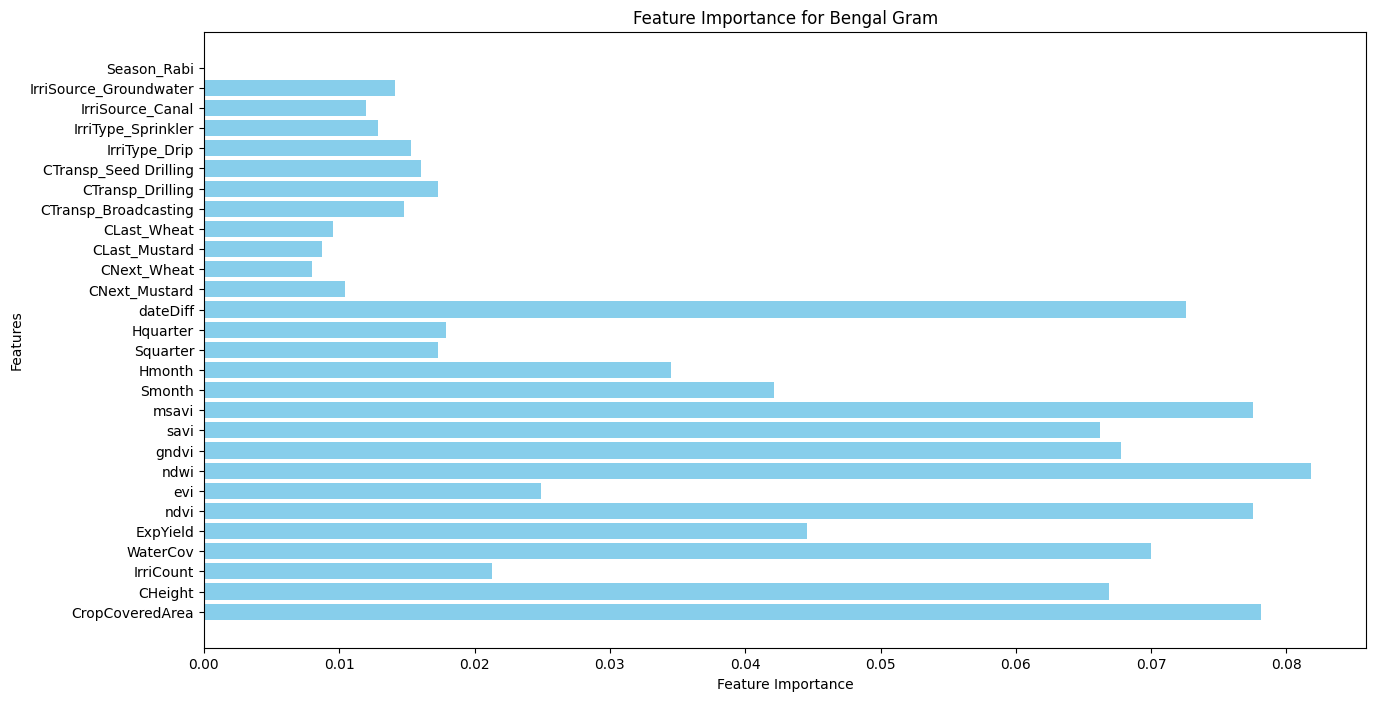

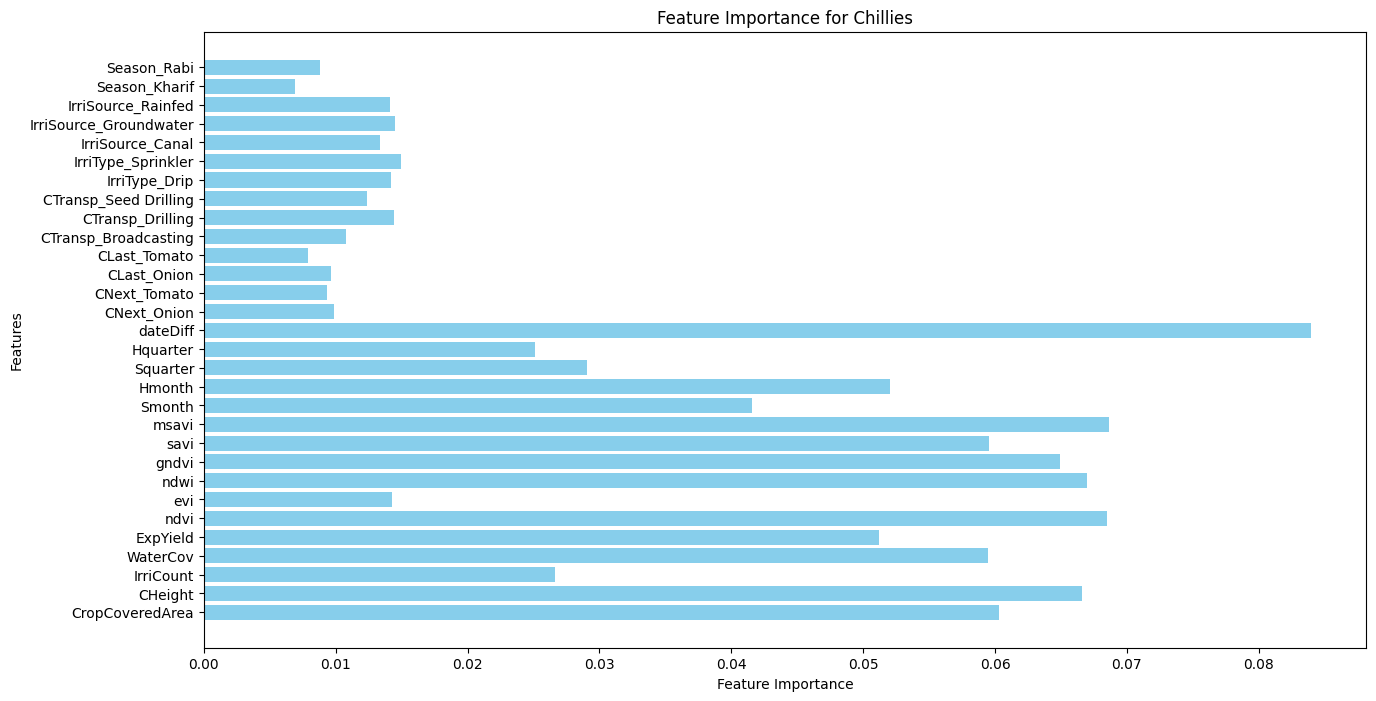

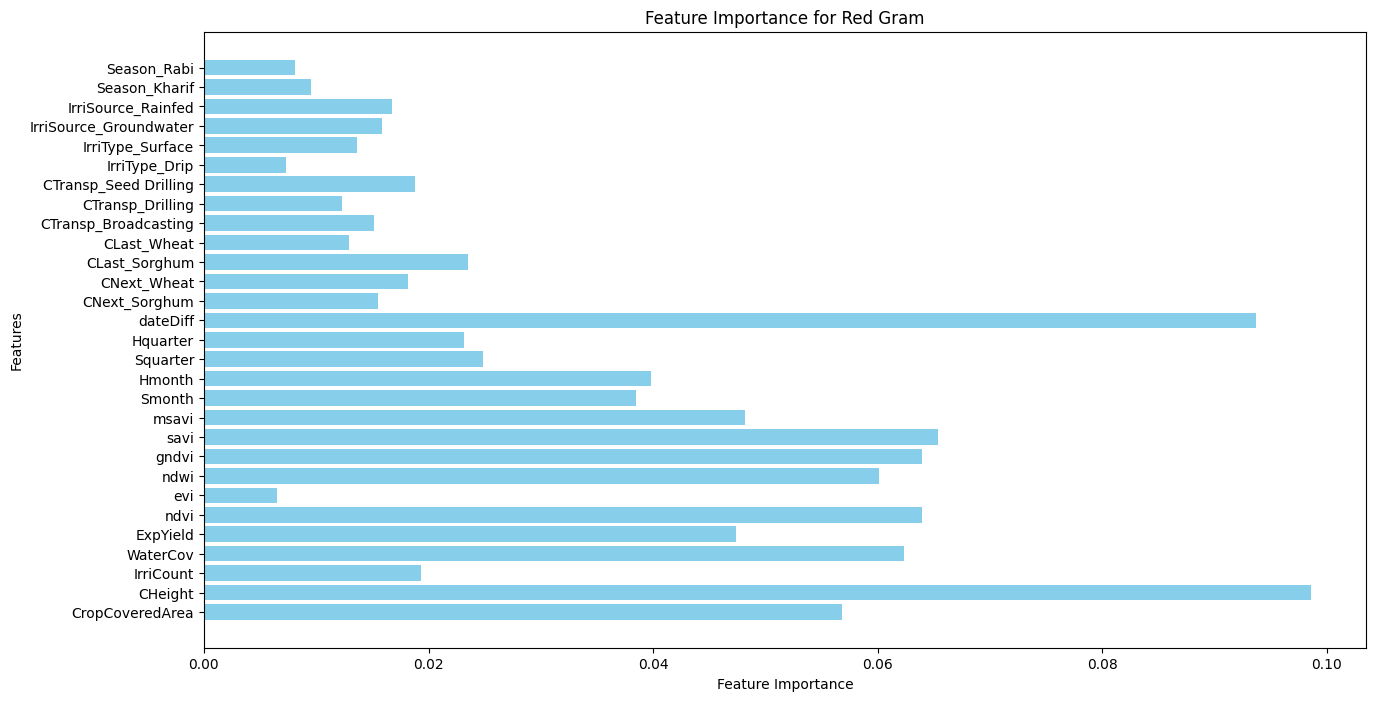

In [137]:
# features importance by crop


crops = df1['Crop'].unique()

model = RandomForestClassifier(random_state=42)

feature_importances_by_crop = {}

for crop in crops:
    crop_data = df1[df1['Crop'] == crop].copy()

    y_crop = encoder.fit_transform(crop_data['category'])
    crop_data.drop(columns=['Crop', 'District', 'Sub-District','category'], axis=1,inplace=True)
    X_crop = pd.get_dummies(crop_data, columns=crop_data.select_dtypes(include='object').columns.tolist())

    model.fit(X_crop, y_crop)

    importances = model.feature_importances_

    feature_importances_by_crop[crop] = (importances, X_crop.columns)

for crop in crops:
    importances, feature_names = feature_importances_by_crop[crop]

    plt.figure(figsize=(15, 8))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {crop}")
    plt.show()


In [138]:
onehot_columns = ['CTransp', 'IrriType', 'IrriSource', 'Season','Crop','CNext','CLast']#

df1 = pd.get_dummies(df1, columns=onehot_columns)



In [139]:
df1.drop(columns=['District', 'Sub-District'], axis=1,inplace=True)


In [140]:
df1

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,...,CLast_Lentil,CLast_Maize,CLast_Mustard,CLast_Onion,CLast_Pea,CLast_Rice,CLast_Sorghum,CLast_Soybean,CLast_Tomato,CLast_Wheat
7528,1.202920,-0.246347,0.379402,1.620456,0.271761,0.506048,-0.079045,0.266575,-0.281567,0.513809,...,True,False,False,False,False,False,False,False,False,False
7660,1.476685,1.001709,0.379402,-0.195489,2.080639,-0.347500,-0.079045,-0.845328,-0.220351,-0.347723,...,False,False,False,False,False,False,False,False,False,True
129,-0.439673,0.156252,1.087002,-0.498146,-0.090015,-0.344714,-0.079045,0.840174,-0.197396,-0.344913,...,False,False,False,False,False,False,True,False,False,False
8624,-0.302790,0.176382,0.379402,0.107169,0.090873,1.624117,-0.079045,-3.774505,4.079102,1.642454,...,False,True,False,False,False,False,False,False,False,False
722,-1.808500,-1.091805,-0.328199,-1.016987,-0.090015,-0.279885,-0.079045,0.082924,-0.097539,-0.279476,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,0.176299,0.498461,-1.035800,0.107169,0.633536,-0.225011,-0.079045,-0.267064,0.052844,-0.224087,...,False,True,False,False,False,False,False,False,False,False
8703,0.039417,0.538721,0.379402,-0.584620,-0.270903,-0.238359,-0.079045,0.076870,0.030177,-0.237561,...,False,False,False,False,False,False,True,False,False,False
8720,0.518506,0.035472,-1.035800,-0.714330,0.633536,-0.278219,-0.079045,-0.167140,-0.049902,-0.277794,...,False,False,False,False,False,False,True,False,False,False
8738,-0.029025,0.176382,1.087002,-0.109015,-0.813566,-0.151448,-0.060501,-1.999565,-0.283707,-0.149827,...,False,True,False,False,False,False,False,False,False,False


In [141]:
encoder = LabelEncoder()
df1['category'] = encoder.fit_transform(df1['category'])

In [144]:


X = df1.drop(columns=['category'], axis=1)
y = df1['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
# # smote = BorderlineSMOTE(sampling_strategy={0:1500,1:6000,2:1500,3:1500}, random_state=42)
# X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# tomek_links = TomekLinks()
# X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


# print(Counter(y_train_sm))
# print((Counter(y_train)))

model= Sequential([
    # Dense(728, activation='relu'),
    Dense(428, activation='relu'),
    Dense(228, activation='relu'),
    # Dropout(0.1),
    Dense(228, activation='relu'),
    # Dropout(0.2),
    Dense(128, activation='relu'),
    # Dropout(0.1),
    Dense(128, activation='relu'),
    # Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

# Define the EarlyStopping callback

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    mode='min',

    patience=100,         # Number of epochs with no improvement to stop training
    restore_best_weights=True,  # Restore weights from the best epoch
    verbose=10           # Print stopping message
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_tomek, y_train_tomek,
    validation_split=0.2,  # Split a portion of training data for validation
    epochs=10,           # Maximum number of epochs
    # callbacks=[early_stopping], # Add the callback
    # class_weight=class_weights
    # batch_size=16

)

# Evaluate the model
# test_loss, test_acc = model_1_0.evaluate(X_test, y_test)
# print(f"Test Accuracy for Classifier 1 (Class 1 vs Class 0): {test_acc}")
#

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6678 - loss: 1.1045 - val_accuracy: 0.0014 - val_loss: 2.7285
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7151 - loss: 0.8330 - val_accuracy: 0.0000e+00 - val_loss: 3.9779
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7856 - val_accuracy: 0.0024 - val_loss: 3.1874
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7236 - loss: 0.7554 - val_accuracy: 0.0566 - val_loss: 2.7944
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7277 - loss: 0.7310 - val_accuracy: 0.0149 - val_loss: 6.3024
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7341 - loss: 0.7152 - val_accuracy: 0.0326 - val_loss: 3.6289
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7431 - loss: 0.6827 - val_accuracy: 0.0268 - val_loss: 4.1433
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7399 - loss: 0.6728 - val_acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


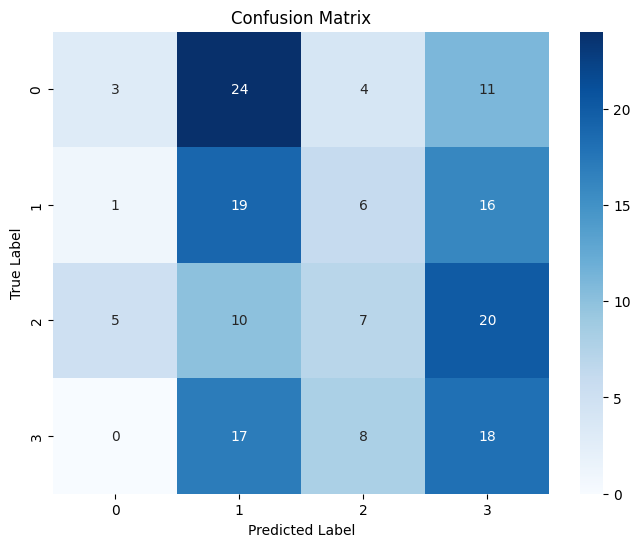

              precision    recall  f1-score   support

           0       0.33      0.07      0.12        42
           1       0.27      0.45      0.34        42
           2       0.28      0.17      0.21        42
           3       0.28      0.42      0.33        43

    accuracy                           0.28       169
   macro avg       0.29      0.28      0.25       169
weighted avg       0.29      0.28      0.25       169



In [145]:
y_pred_proba = model.predict(X_test)  # Probabilities for each class

y_pred = np.argmax(y_pred_proba, axis=1)  # Use argmax to get the class with highest probability

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

two minority classes

In [146]:
from imblearn.ensemble import EasyEnsembleClassifier
X = df1[(df1['category'] !=1 )& (df1['category'] != 0)]
y = X['category']
# y = np.where(y == 3,1,y)
X = X.drop(columns=['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [147]:
smote = BorderlineSMOTE(sampling_strategy={3:3000,2:3000}, random_state=42)


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils

In [148]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=50, random_state=4,replacement=True)

# Train the model
easy_ensemble.fit(X_train_tomek, y_train_tomek
                  )

# Make predictions
y_pred = easy_ensemble.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The EasyEnsembleClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:445: FutureWarning: The `_safe_tags` function is deprecated in 1.6 and will be removed in 1.7. Use the public `get_tags` function instead and make sure to implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

              precision    recall  f1-score   support

           2       0.57      0.58      0.57        85
           3       0.57      0.56      0.56        84

    accuracy                           0.57       169
   macro avg       0.57      0.57      0.57       169
weighted avg       0.57      0.57      0.57       169



binary classification for class Healthy vs all

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
X = df1.drop(columns=['category'])

y = df1['category']
y = np.where(y == 2,0,y)
y = np.where(y == 3,0,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
smote = BorderlineSMOTE(sampling_strategy={1:6000,0:2000}, random_state=42)


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


In [ ]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=100, random_state=4,replacement=True)

# Train the model
easy_ensemble.fit(X_train_tomek, y_train_tomek
                  )

# Make predictions
y_pred = easy_ensemble.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.19      0.18       276
           1       0.82      0.80      0.81      1298

    accuracy                           0.69      1574
   macro avg       0.49      0.49      0.49      1574
weighted avg       0.71      0.69      0.70      1574



In [ ]:
from sklearn.model_selection import GridSearchCV

# Data preprocessing
X = df1.drop(columns=['category'], axis=1)
y = df1['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

# Apply BorderlineSMOTE and Tomek Links
smote = BorderlineSMOTE(sampling_strategy={1: 6000, 0: 2500, 2:2500, 3: 2500}, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)

print("Class distribution before resampling:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_sm))
print("Class distribution after Tomek Links:", Counter(y_train_tomek))

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'max_depth': [3, 4, 5, 6],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBoost classifier
xgb = XGBClassifier(objective='multi:softmax', random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',  # You can use 'roc_auc_ovr' for multi-class ROC-AUC
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Fit the model
print("Starting GridSearchCV...")
grid_search.fit(X_train_tomek, y_train_tomek)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution before resampling: Counter({1: 5190, 2: 387, 0: 378, 3: 338})
Class distribution after SMOTE: Counter({1: 6000, 3: 2500, 2: 2500, 0: 2500})
Class distribution after Tomek Links: Counter({1: 5789, 0: 2500, 2: 2432, 3: 2430})
Starting GridSearchCV...
Fitting 3 folds for each of 6912 candidates, totalling 20736 fits


KeyboardInterrupt: 

In [149]:

from xgboost import XGBClassifier

X = df1.drop(columns=['category'], axis=1)
y = df1['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4,stratify=y)
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)
# Check class distribution after Tomek Links

print(Counter(y_train))
print(Counter(y_train_sm))
print(Counter(y_train_tomek))

model = XGBClassifier(
    objective='multi:softmax',
    # random_state=42,
    n_estimators=1000,
    learning_rate=0.01,
    # gamma=7,
    max_depth=4,
    # min_child_weight=10,
    # eta=2,

    # subsample=0.8,
    # colsample_bytree=0.1,
    # subsample=0.8,
    # eval_metric='auc',

)
# Train the model
model.fit(X_train_tomek, y_train_tomek)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils

Counter({3: 380, 0: 379, 1: 379, 2: 379})
Counter({0: 380, 1: 380, 2: 380, 3: 380})
Counter({0: 380, 3: 238, 1: 229, 2: 227})
              precision    recall  f1-score   support

           0       0.28      0.55      0.37        42
           1       0.24      0.14      0.18        42
           2       0.15      0.09      0.12        43
           3       0.28      0.24      0.26        42

    accuracy                           0.25       169
   macro avg       0.24      0.26      0.23       169
weighted avg       0.24      0.25      0.23       169

